In [1]:
from EnergyProfiler import PowerZone,Profiler

# Profile and save

## Power zone

Init a `list` of `PowerZone`, the constructor get the rapl interface as argument.

In [2]:
powerzones=[PowerZone("/sys/class/powercap/intel-rapl:0"),
            PowerZone("/sys/class/powercap/intel-rapl:1"),
            PowerZone("/sys/class/powercap/intel-rapl:0:1")]

print("Initialized power zone:")
for zone in powerzones:
    print(f"\t{zone}")

Initialized power zone:
	package-0 59864007880 uj
	psys 39841909173 uj
	uncore 2094399301 uj


### Autodetect powerzone
Try to autodetect all powerzone.

In [4]:
powerzones=PowerZone.autodetect()
powerzones

[psys 39934658936 uj,
 dram 11861223175 uj,
 core 23748135798 uj,
 package-0 59885932507 uj,
 uncore 2094969429 uj]

## Profiler
Attach the `Profiler` to the `powerzones` list, setup the profile `time` in seconds`[s]` and timestep `dt` in seconds `[s]`.

In [11]:
profiler=Profiler(powerzones,time=100,dt=0.1)
print(profiler)

Profile time: 100 s, N* samples 1000, dt 0.1 s
Zones:
	psys
	dram
	core
	package-0
	uncore



### Start profiling
Start the profiler and wait till the `return`.

In [12]:
profiler.start()

### Visualize 
Once the `Profiler` has finish his job, we are ready to visualize the result:

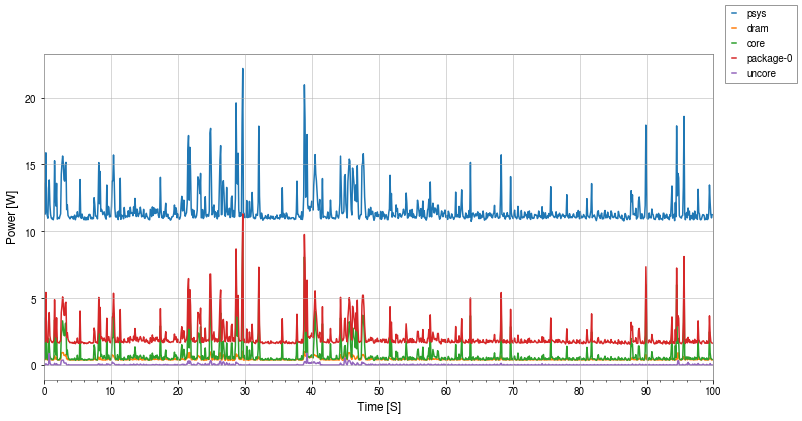

In [13]:
profiler.plot()

### Save
We are ready to save it using `hdf5` format. 

In [14]:
profiler.save("energy_data.hdf5")

### Metadata
If desired, enrich the data with additional metadata, using the static method `metadata_apply`.

In [15]:

metadata= { "cpu":"Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz",
"cores":12,
"socket":2,
"memory_size":"768",
"memory_type":"DDR4 2666 MT/s",
"interface":"intel-rapl",
"os":"Fedora 37",
"software":"my benchmark"}

profiler.metadata_apply("energy_data.hdf5",metadata)

### Load another energy profile from file
Is possible to load another energy profile from file, the file contain all stuff to plot and describe the data. 

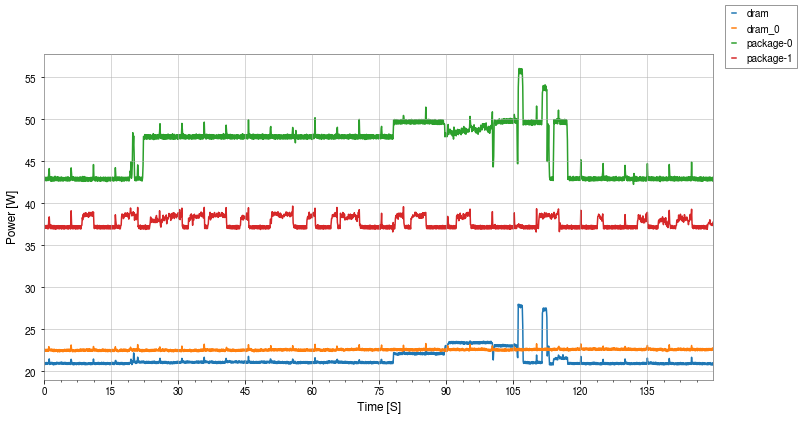

In [16]:
profiler=Profiler()
profiler.load_profile("thin007_run.hdf5")
profiler.plot()